# Esercizio 11.2
Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

In order to solve this problem I will follow the same approach as Esercizio 11.1. The only modification required throughout the code concerns the dimensionality of the problem, which in this case is two. Consequently, it was necessary to redefine the data generation process for both training and validation, as well as to adjust the parameters employed in the neural network.

In [52]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
N_epochs = 50
N_train = 10000 
N_valid = 1000 
sigma = 0.2
bach_size = 32

def f(x, y):
    return np.sin((x ** 2 + y ** 2))

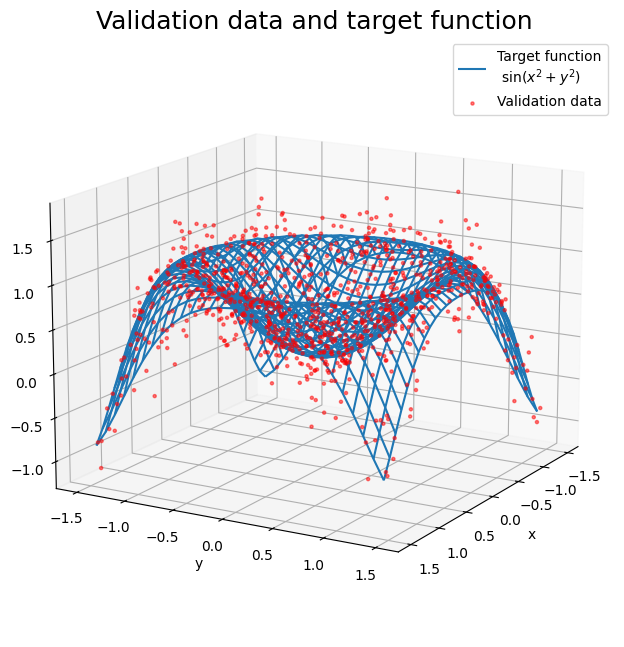

In [54]:
x_train = np.random.uniform(-3./2., 3./2., N_train)
x_valid = np.random.uniform(-3./2., 3./2., N_valid)

y_train = np.random.uniform(-3./2., 3./2., N_train)
y_valid = np.random.uniform(-3./2., 3./2., N_valid)

XY_train = np.column_stack((x_train,y_train))
XY_valid = np.column_stack((x_valid,y_valid))

z_target = f(x_valid, y_valid)
z_train = np.random.normal(f(x_train,y_train), sigma)
z_valid = np.random.normal(f(x_valid,y_valid), sigma)

fig = plt.figure(figsize = (6, 6))
ax = Axes3D(fig)
fig.add_axes(ax)

x_surf = np.arange(-3./2., 3./2., 0.1)
y_surf = np.arange(-3./2., 3./2., 0.1)
X_surf, Y_surf = np.meshgrid(x_surf,y_surf)
ax.plot_wireframe(X_surf, Y_surf, f(X_surf, Y_surf), label = 'Target function\n $\sin(x^2+y^2)$')
ax.scatter(x_valid, y_valid, z_valid, marker = ".", label = 'Validation data', color = 'red', alpha = 0.5)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.title("Validation data and target function", fontsize = 18)
ax.legend()
ax.view_init(15, 30)

plt.show()

In [55]:
model = tf.keras.Sequential()
model.add(Dense(32, input_shape=(2,), activation='tanh')) # input layer with one neuron and linear activation
model.add(Dense(32, activation = 'tanh'))
model.add(Dense(1, activation = 'tanh'))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='nadam', loss='mse', metrics=['mse'])

# Get a SUMMARY of our composed model
model.summary()

/Users/marta/Documents/LSN/.conda/lib/python3.9/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,185 (4.63 KB)

 Trainable params: 1,185 (4.63 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
# get a summary of our composed model
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,185 (4.63 KB)

 Trainable params: 1,185 (4.63 KB)

 Non-trainable params: 0 (0.00 B)

In [57]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x = XY_train, y = z_train, 
               	  batch_size = bach_size, epochs = N_epochs,
                    # shuffle input before each epoch (not mandatory)
                    shuffle = True,                        
                    validation_data = (XY_valid, z_valid))

Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2708 - mse: 0.2708 - val_loss: 0.1899 - val_mse: 0.1899
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step - loss: 0.1924 - mse: 0.1924 - val_loss: 0.1911 - val_mse: 0.1911
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step - loss: 0.1880 - mse: 0.1880 - val_loss: 0.1890 - val_mse: 0.1890
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - loss: 0.1866 - mse: 0.1866 - val_loss: 0.1840 - val_mse: 0.1840
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - loss: 0.1792 - mse: 0.1792 - val_loss: 0.1721 - val_mse: 0.1721
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step - loss: 0.1720 - mse: 0.1720 - val_loss: 0.1646 - val_mse: 0.1646
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - loss: 0.1627 - mse: 0.1627 - val_loss: 0.1643 - val_mse: 0.1643
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step - loss: 0.1577 - mse: 0.1577 - val_loss: 0.1497 - val_mse: 0.1497
Epoch 9/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s

In [59]:
print("RESULTS \n")
w = model.get_weights()

# evaluate with TEST data
print("Test data evaluation")
score = model.evaluate(XY_valid, z_valid, batch_size = bach_size, verbose = 0)
print('Test loss:     ', score[0])
print('Test accuracy: ', score[1])
print()

# evaluate with the EXACT curve
print("Exact curve evaluation")
score = model.evaluate(XY_valid, z_target, batch_size = bach_size, verbose = 0)
print('Test loss:     ', score[0])
print('Test accuracy: ', score[1])

RESULTS 

Test data evaluation
Test loss:      0.04607623815536499
Test accuracy:  0.04607623815536499

Exact curve evaluation
Test loss:      0.004494680091738701
Test accuracy:  0.004494680091738701


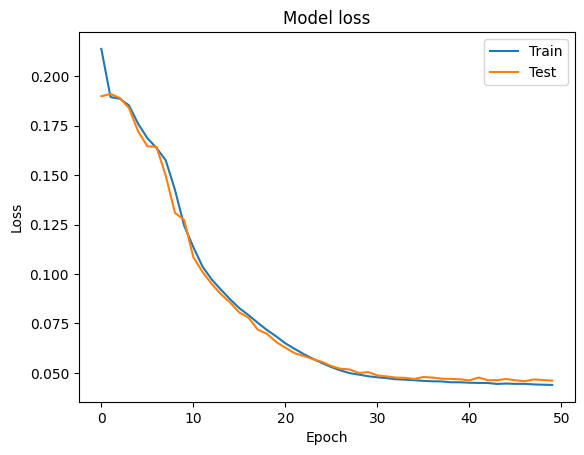

In [60]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
XY_predicted.shape: (10000, 2)
X_pred.shape: (100, 100)
Y_pred.shape: (100, 100)
Z_pred.shape: (100, 100)


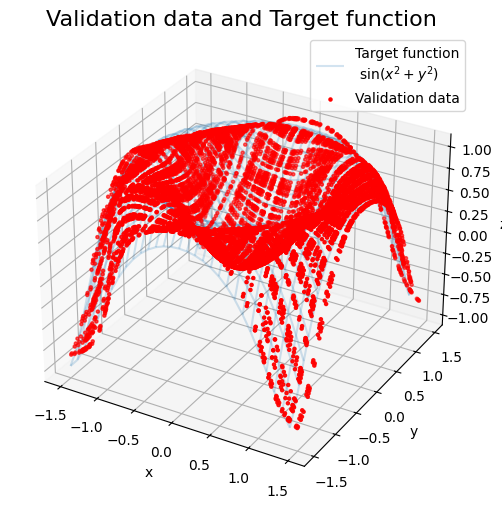

In [80]:
x_predicted = np.random.uniform(-3./2, 3./2, 100)
y_predicted = np.random.uniform(-3./2, 3./2, 100)
x_predicted.sort()
y_predicted.sort()

# Crea la griglia meshgrid
X_pred, Y_pred = np.meshgrid(x_predicted, y_predicted)

# CORREZIONE: Usa X_pred.ravel() e Y_pred.ravel() invece di x_predicted e y_predicted
XY_predicted = np.column_stack((X_pred.ravel(), Y_pred.ravel()))

# Ora XY_predicted avrà forma (10000, 2) e Z_pred potrà essere rimodellato in (100, 100)
Z_pred = model.predict(XY_predicted).reshape(X_pred.shape)

print(f"XY_predicted.shape: {XY_predicted.shape}")  # (10000, 2)
print(f"X_pred.shape: {X_pred.shape}")              # (100, 100)
print(f"Y_pred.shape: {Y_pred.shape}")              # (100, 100)
print(f"Z_pred.shape: {Z_pred.shape}")              # (100, 100)

# Plot 3D
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_wireframe(X_surf, Y_surf, f(X_surf, Y_surf),
                  label='Target function\n $\sin(x^2+y^2)$',
                  alpha=0.2)

ax.scatter(X_pred, Y_pred, Z_pred, marker=".", color='red', label='Validation data')

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.title("Validation data and Target function", fontsize=16)
ax.legend()
plt.show()

### Variation of Parameters
- The increase in input dimensionality required a significant enlargement of the training dataset from 1000 to 10000.  
- With fewer data points, the surface variability could not be properly captured, leading to underfitting.  
- The number of epochs was also increased; however, the improvement still saturated, this time after approximately 30 epochs, as shown in the plot.  

### Neural Network Architecture
- The overall structure from the previous exercise was retained.  
- The only change was an adjustment of the input layer to handle the two-dimensional data.  

### Optimizer and Activation Function
- The optimizer was replaced with **Nadam** (Nesterov-accelerated Adaptive Moment Estimation), a variant of Adam that leverages Nesterov momentum for accelerated convergence.  
- The activation function was switched to **tanh**, which proved more appropriate for this problem.  

### Results
- These modifications allowed the model to reach good accuracy in predicting the function.  
- The quality of the fit is clearly visible in the 3D plot above.  
